In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno


In [2]:
df= pd.read_csv(r'C:\Users\user\Desktop\projects datascience\DS\Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
df['Date'].nunique()

143

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
(df["Weekly_Sales"]<0).sum()

np.int64(0)

In [9]:
sales_by_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

In [10]:
sales_by_store.head()

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

<Axes: >

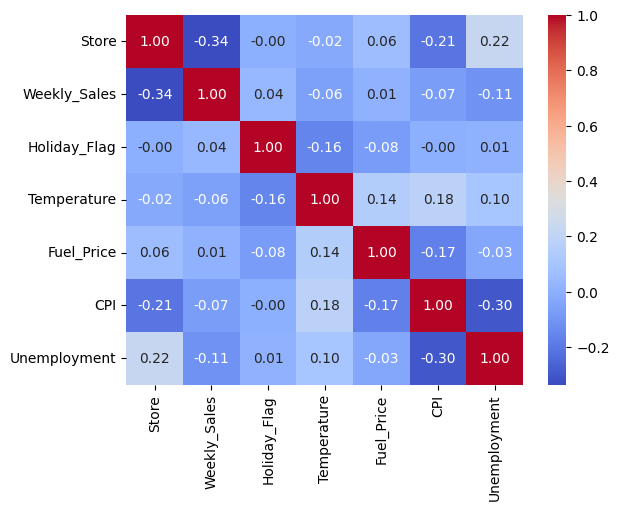

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True , cmap='coolwarm', fmt='.2f')

<Axes: xlabel='Holiday_Flag'>

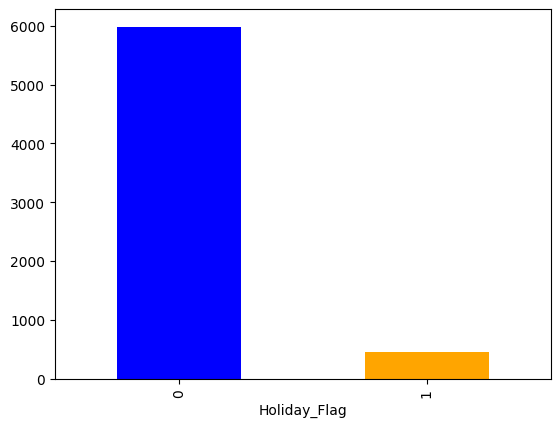

In [12]:
df['Holiday_Flag'].value_counts().plot(kind='bar', color=['blue','orange'])

In [13]:
df.sample()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2801,20,16-09-2011,1979009.46,0,64.02,3.742,209.189389,7.274


<Axes: >

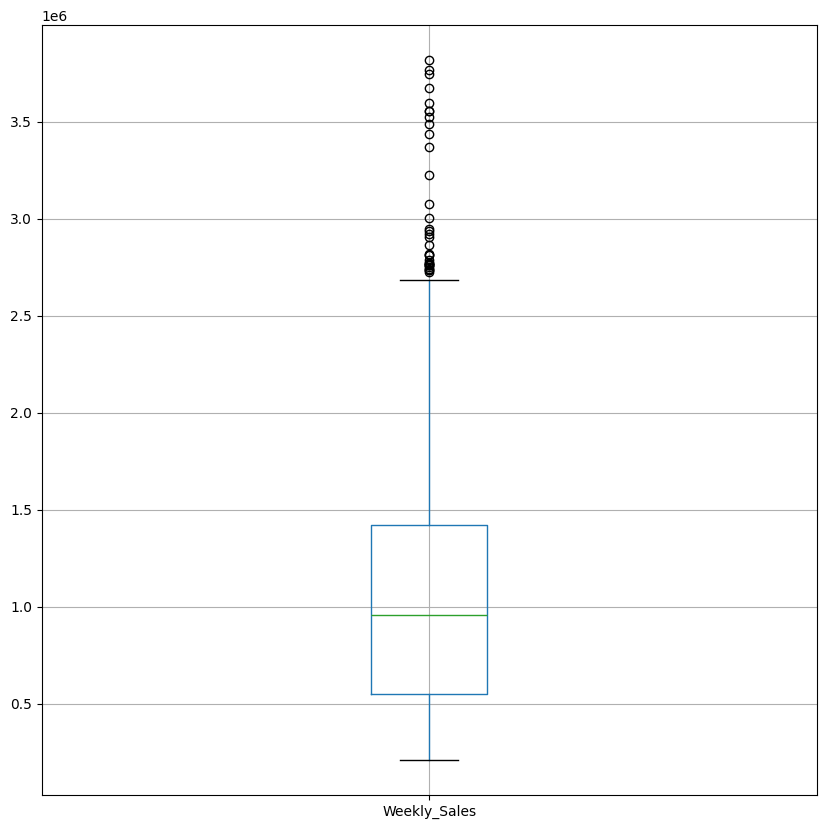

In [ ]:
df.boxplot(column='Weekly_Sales',figsize=(10,10))

Data Cleaning 


In [15]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [17]:
df['Date']

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [18]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df[['Year','Month']].head()

,Year,Month
0,2010,2
1,2010,2
2,2010,2
3,2010,2
4,2010,3


In [19]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR

df = df[(df['Weekly_Sales']>=lower_bound)& (df['Weekly_Sales']<=upper_bound)]

In [20]:
len(df)

5705

In [21]:
df['Weekly_Sales'].describe()

count    5.705000e+03
mean     9.127236e+05
std      4.362338e+05
min      2.099862e+05
25%      5.266412e+05
50%      8.856080e+05
75%      1.274463e+06
max      1.853162e+06
Name: Weekly_Sales, dtype: float64

In [22]:
#df.to_csv("cleaned_walmart_data.csv", index=False)
